# LAB 6 preamble code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import urllib.request
import tarfile
import io

# Additional Import Code for dataset GE

In [2]:
def load_tcga_data():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz'
    try:
        with urllib.request.urlopen(url) as response:
            with tarfile.open(fileobj=io.BytesIO(response.read()), mode="r:gz") as tar:
                data_path = 'TCGA-PANCAN-HiSeq-801x20531/data.csv'
                labels_path = 'TCGA-PANCAN-HiSeq-801x20531/labels.csv'
                data_file = tar.extractfile(data_path)
                X = pd.read_csv(data_file, index_col=0)
                labels_file = tar.extractfile(labels_path)
                labels_df = pd.read_csv(labels_file, index_col=0)
                y = labels_df['Class']
                return X, y
    except Exception as e:
        print(f"Failed to download or process data. Error: {e}")
        return None, None
X, y = load_tcga_data()
# verify that both the features and the labels loaded successfully
print(X.head())
print(y.head())

          gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

            gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
sample_0  0.591871     0.0     0.0  ...    4.926711    8.210257    9.723516   
sample_1  0.000000     0.0     0.0  ...    4.593372    7.323865    9.740931   
sample_2  0.452595     0.0     0.0  ...    5.125213    8.127123   10.908640   
sample_3  0.434882     0.0     0.0  ...    6.076566    8.792959   10.141520   
sample_4  0.360982     0.0     0.0  ...    5.996032    8.891425   10.373790   

          gene_20524  gene_20525  gene_20526  gene

# Question 1
## Load the data into feature matrix X and true cancer type labels y_true. Print the dimensions of X. How many patients and genes (features) are there? What does the numerical value of each feature in X represent? 

In [3]:
print("############ Assignment 6 Question 1 BEGIN ############")

X, y = load_tcga_data()

print(X.head())
print(y.head())

print("There are 801 patients and 20531 gene features.")
print("The numerical value of each feature in X represents the normalized expression level of that specific gene for a patient.")

print("############ Assignment 6 Question 1 END ############")

############ Assignment 6 Question 1 BEGIN ############
          gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

            gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
sample_0  0.591871     0.0     0.0  ...    4.926711    8.210257    9.723516   
sample_1  0.000000     0.0     0.0  ...    4.593372    7.323865    9.740931   
sample_2  0.452595     0.0     0.0  ...    5.125213    8.127123   10.908640   
sample_3  0.434882     0.0     0.0  ...    6.076566    8.792959   10.141520   
sample_4  0.360982     0.0     0.0  ...    5.996032    8.891425   10.37379

# Question 2
## Do not do ANY scaling to any feature. Do not use PCA (Principal Component Analysis) in this assignment at any point. Train K-Means for all k <= 15 (Use random_state=0, n_init=10). Plot:
- WCSS v. k (Elbow Chart)
- Silhouette Score v. k
- ARI v. k


############ Assignment 6 Question 2 BEGIN ############


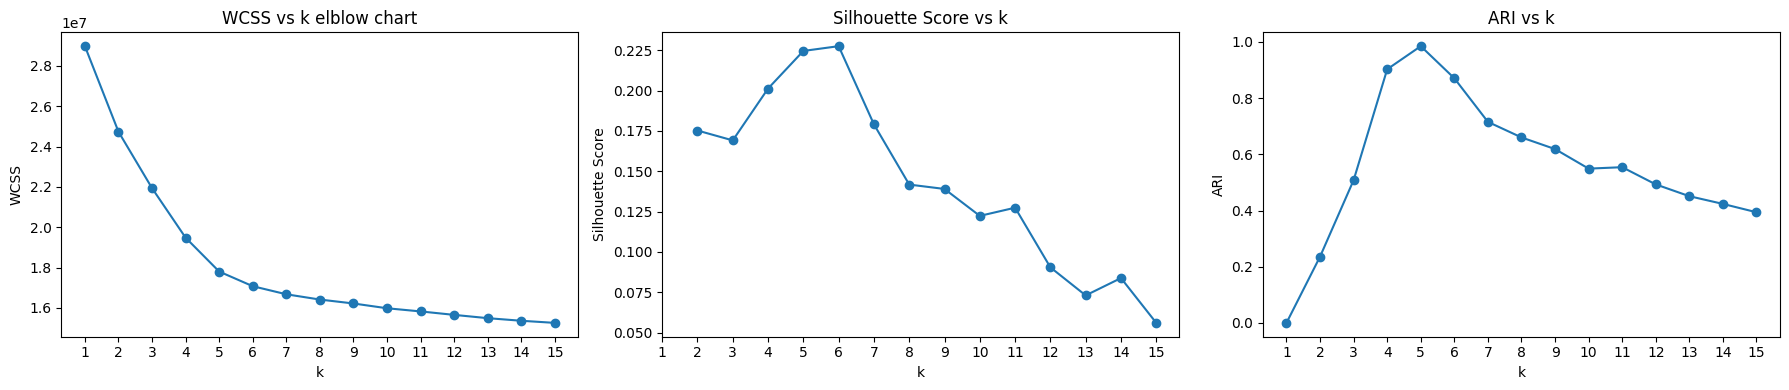

############ Assignment 6 Question 2 END ############


In [4]:
print("############ Assignment 6 Question 2 BEGIN ############")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np

ks = list(range(1, 16))
wcss = []
sil_scores = []
aris = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = km.fit_predict(X)
    wcss.append(km.inertia_)
    if k > 1:
        sil_scores.append(silhouette_score(X, labels))
    else:
        sil_scores.append(np.nan)
    aris.append(adjusted_rand_score(y, labels))

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(ks, wcss, marker='o')
axes[0].set_xticks(ks)
axes[0].set_xlabel('k')
axes[0].set_ylabel('WCSS')
axes[0].set_title('WCSS vs k elblow chart')

axes[1].plot(ks, sil_scores, marker='o')
axes[1].set_xticks(ks)
axes[1].set_xlabel('k')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score vs k')

axes[2].plot(ks, aris, marker='o')
axes[2].set_xticks(ks)
axes[2].set_xlabel('k')
axes[2].set_ylabel('ARI')
axes[2].set_title('ARI vs k')

plt.tight_layout()
plt.show()

print("############ Assignment 6 Question 2 END ############")

# Question 3
## Based on your analysis of Q2, what does each method recommend as the optimal “k”. If you did not know that the dataset contained 5 cancers, what “k” would you have picked and why?

In [5]:
print("############ Assignment 6 Question 3 BEGIN ############")

print(f"WCSS (elbow) recommends k = 5")
print(f"Silhouette score recommends k = 6")
print(f"ARI recommends k = 5 \n")

print("If I did not know the dataset contained 5 cancers, I would pick k = 5.")
print("the WCSS elbow appears near 5 as there is diminishing returns after 5, the silhouette is high at 5 and peaks at 6 but only slightly higher,")
print("and choosing k = 5 gives a clustering consistent with the elbow and near-peak silhouette.")

print("############ Assignment 6 Question 3 END ############")

############ Assignment 6 Question 3 BEGIN ############
WCSS (elbow) recommends k = 5
Silhouette score recommends k = 6
ARI recommends k = 5 

If I did not know the dataset contained 5 cancers, I would pick k = 5.
the WCSS elbow appears near 5 as there is diminishing returns after 5, the silhouette is high at 5 and peaks at 6 but only slightly higher,
and choosing k = 5 gives a clustering consistent with the elbow and near-peak silhouette.
############ Assignment 6 Question 3 END ############


# Question 4
## Now, for k=5, extract the cluster centers (centroids) from the trained K-Means model using the .cluster_centers_ attribute. This will be a (5, n_features) array where each row is a centroid. For each of the 5 centroids, find the top 10 genes (i.e., the 10 feature indices with the highest expression values). Print the table that lists the top 10 genes for each cluster. Do you see any overlap in the top genes between clusters? What does a high value for a specific gene in a centroid signify biologically?

In [6]:
from collections import Counter

print("############ Assignment 6 Question 4 BEGIN ############")
# train KMeans with k=5 and extract centroids
km5 = KMeans(n_clusters=5, random_state=0, n_init=10).fit(X)
centers = km5.cluster_centers_  # (5, n_features) array
cent_df = pd.DataFrame(centers, columns=X.columns, index=[f'centroid_{i}' for i in range(5)])

# print top 10 genes for each centroid
top_lists = [cent_df.iloc[i].nlargest(10).index.tolist() for i in range(5)]
top_df = pd.DataFrame(top_lists, index=[f'cluster_{i}' for i in range(5)], columns=[f'top_{j+1}' for j in range(10)])
print("Top 10 genes per cluster (by centroid expression):")
display(top_df)

# check overlap between top 10 clusters
all_genes = [g for lst in top_lists for g in lst]
counts = Counter(all_genes)
overlapping = {g: c for g, c in counts.items() if c > 1}

print("\nOverlapping genes appearing in top-10 of multiple clusters (gene: count):")
if overlapping:
    for g, c in overlapping.items():
        print(f"{g}: {c}")
else:
    print("No overlaps found among top-10 genes.")

# interpretation
print("\nA high value for a specific gene in a centroid means the mean expression of that gene across samples assigned to that cluster is high \n" \
"biologically, this suggests the gene might act as a marker of that clusters cancer subtype")
print("############ Assignment 6 Question 4 END ############")

############ Assignment 6 Question 4 BEGIN ############
Top 10 genes per cluster (by centroid expression):


,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10
cluster_0,gene_5380,gene_6857,gene_18570,gene_3371,gene_230,gene_1322,gene_19375,gene_7899,gene_6698,gene_5590
cluster_1,gene_4041,gene_230,gene_5380,gene_232,gene_6566,gene_4042,gene_4053,gene_6857,gene_17077,gene_5388
cluster_2,gene_9176,gene_9175,gene_5380,gene_5388,gene_230,gene_15242,gene_18570,gene_203,gene_232,gene_11409
cluster_3,gene_230,gene_289,gene_6698,gene_5380,gene_232,gene_3371,gene_1322,gene_18570,gene_6857,gene_15898
cluster_4,gene_230,gene_5380,gene_232,gene_3540,gene_6857,gene_18570,gene_5388,gene_9275,gene_15250,gene_6698



Overlapping genes appearing in top-10 of multiple clusters (gene: count):
gene_5380: 5
gene_6857: 4
gene_18570: 4
gene_3371: 2
gene_230: 5
gene_1322: 2
gene_6698: 3
gene_232: 4
gene_5388: 3

A high value for a specific gene in a centroid means the mean expression of that gene across samples assigned to that cluster is high 
biologically, this suggests the gene might act as a marker of that clusters cancer subtype
############ Assignment 6 Question 4 END ############


# Question 5
## Train an AgglomerativeClustering model with n_clusters = 15. Generate and plot a dendrogram. Use truncate_mode='level' and p=6 for the dendrogram.  Calculate the WCSS, Silhouette Score, and ARI at a cut of the dendrogram for all k <=10. Compare these 3 numbers for k = 3, 5, 7, 9 with Question 2. What are your observations on relative performance of the two techniques?

############ Assignment 6 Question 5 BEGIN ############


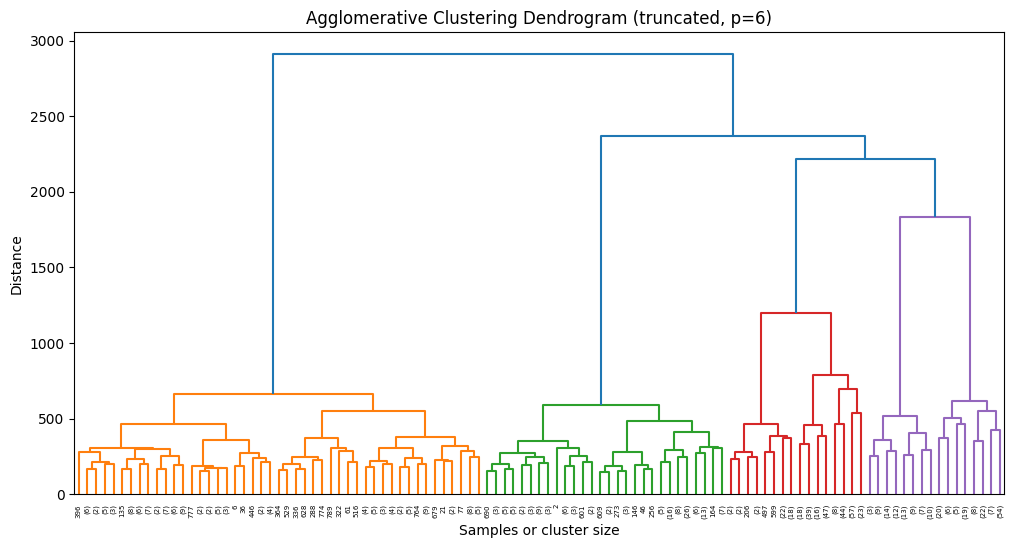

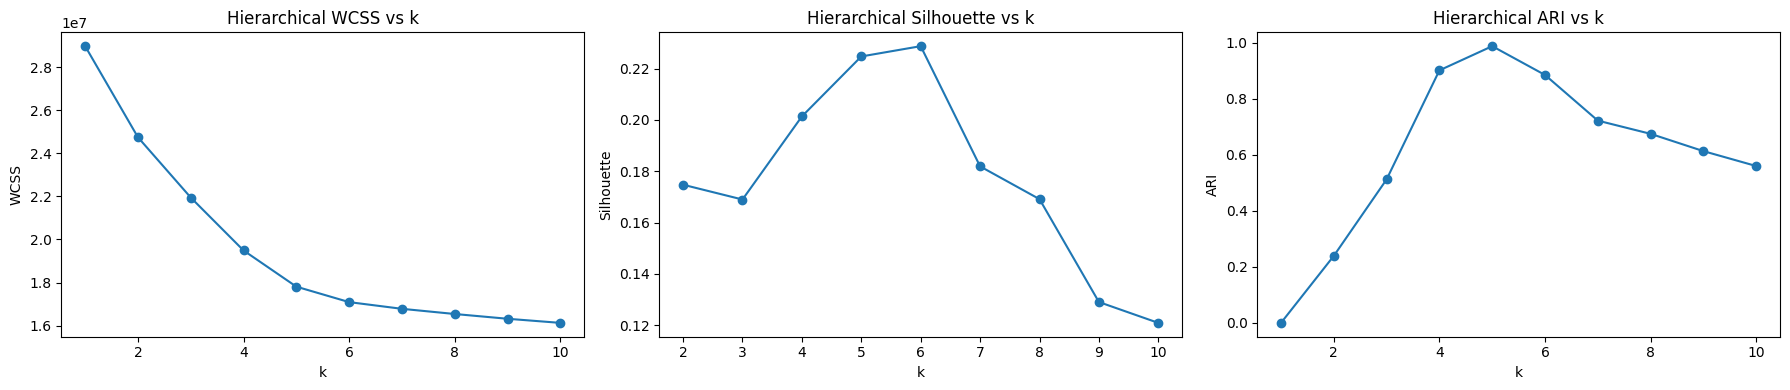


Comparison (Hierarchical vs KMeans) for k = 3,5,7,9:

k = 3:
  WCSS - Hierarchical: 2.195e+07, KMeans: 2.194e+07
  Silhouette - Hierarchical: 0.1690, KMeans: 0.1691
  ARI - Hierarchical: 0.5118, KMeans: 0.5082

k = 5:
  WCSS - Hierarchical: 1.781e+07, KMeans: 1.780e+07
  Silhouette - Hierarchical: 0.2248, KMeans: 0.2246
  ARI - Hierarchical: 0.9870, KMeans: 0.9851

k = 7:
  WCSS - Hierarchical: 1.678e+07, KMeans: 1.668e+07
  Silhouette - Hierarchical: 0.1819, KMeans: 0.1791
  ARI - Hierarchical: 0.7214, KMeans: 0.7156

k = 9:
  WCSS - Hierarchical: 1.632e+07, KMeans: 1.622e+07
  Silhouette - Hierarchical: 0.1290, KMeans: 0.1390
  ARI - Hierarchical: 0.6126, KMeans: 0.6187

Observations:
- KMeans consistently has lower WCSS than hierarchical clustering since KMeans optimizes inertia
- Silhouette and ARI differ with different k values (almost 50/50), but often KMeans has equal or better ARI, meaning that it better recovers known labels for the k val
- relative performance varies with k,

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

print("############ Assignment 6 Question 5 BEGIN ############")

# train AgglomerativeClustering model with n_clusters = 15
agg_model = AgglomerativeClustering(n_clusters=15, linkage='ward')
agg_labels = agg_model.fit_predict(X.values)

# compute linkage matrix for dendrogram
Z = linkage(X.values, method='ward')

# plot truncated dendrogram (p=6)
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=6)
plt.title('Agglomerative Clustering Dendrogram (truncated, p=6)')
plt.xlabel('Samples or cluster size')
plt.ylabel('Distance')
plt.show()

# evaluate metrics for k = 1 to 10 by cutting the dendrogram
ks_h = list(range(1, 11))
h_wcss, h_sil, h_ari = [], [], []

for k_h in ks_h:
    labels_h = fcluster(Z, t=k_h, criterion='maxclust')
    
    # WCSS
    if k_h == 1:
        centroid = X.values.mean(axis=0)
        inertia = np.sum((X.values - centroid) ** 2)
    else:
        inertia = 0.0
        for lab in np.unique(labels_h):
            pts = X.values[labels_h == lab]
            cen = pts.mean(axis=0)
            inertia += np.sum((pts - cen) ** 2)
    h_wcss.append(inertia)
    
    # silhouette Score
    if k_h > 1:
        h_sil.append(silhouette_score(X.values, labels_h))
    else:
        h_sil.append(np.nan)
    
    # ARI 
    h_ari.append(adjusted_rand_score(y, labels_h))

# plot WCSS, Silhouette, ARI vs k for hierarchical clustering
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
ax[0].plot(ks_h, h_wcss, marker='o')
ax[0].set_title('Hierarchical WCSS vs k')
ax[0].set_xlabel('k')
ax[0].set_ylabel('WCSS')

ax[1].plot(ks_h, h_sil, marker='o')
ax[1].set_title('Hierarchical Silhouette vs k')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Silhouette')

ax[2].plot(ks_h, h_ari, marker='o')
ax[2].set_title('Hierarchical ARI vs k')
ax[2].set_xlabel('k')
ax[2].set_ylabel('ARI')

plt.tight_layout()
plt.show()

# compare for k = 3,5,7,9
print("\nComparison (Hierarchical vs KMeans) for k = 3,5,7,9:")
for k in [3, 5, 7, 9]:
    idx = k - 1
    print(f"\nk = {k}:")
    print(f"  WCSS - Hierarchical: {h_wcss[idx]:.3e}, KMeans: {wcss[idx]:.3e}")
    print(f"  Silhouette - Hierarchical: {h_sil[idx]:.4f}, KMeans: {sil_scores[idx]:.4f}")
    print(f"  ARI - Hierarchical: {h_ari[idx]:.4f}, KMeans: {aris[idx]:.4f}")

print("\nObservations:")
print("- KMeans consistently has lower WCSS than hierarchical clustering since KMeans optimizes inertia")
print("- Silhouette and ARI differ with different k values (almost 50/50), but often KMeans has equal or better ARI, meaning that it better recovers known labels for the k val")
print("- relative performance varies with k, so method should be chosen based on whether inertia optimization (choose KMeans) or hierarchical structure/interpretability (choose hierarchical dendrogram) is more important")

print("############ Assignment 6 Question 5 END ############")


# Question 6
## Does the dendrogram show a branching structure that makes biological sense (e.g., are some cancer types more genetically similar to each other than to others)? What would a tall U-shape on this dendrogram mean biologically and what would a short U-shape indicate? Does the dendrogram offer clues about possible “sub-cancers” that might be worth exploring?

In [8]:
print("############ Assignment 6 Question 6 BEGIN ############")
print("the dendrogram branching can be analyzed for biological sense by cutting it to form clusters/comparing cluster composition to true cancer labels")
print("""
- tall U shapes indicate merges of genetically dissimilar groups, indicating more biologically distinct cancer types
- short U shapes indicate merges of genetically similar groups, indicating subtypes/small within-type variation
- clusters where one true label strongly dominates suggest biologically meaningful grouping while mixed clusters may reveal sub-cancers or insufficient separation.
""")
print("############ Assignment 6 Question 6 END ############")

############ Assignment 6 Question 6 BEGIN ############
the dendrogram branching can be analyzed for biological sense by cutting it to form clusters/comparing cluster composition to true cancer labels

- tall U shapes indicate merges of genetically dissimilar groups, indicating more biologically distinct cancer types
- short U shapes indicate merges of genetically similar groups, indicating subtypes/small within-type variation
- clusters where one true label strongly dominates suggest biologically meaningful grouping while mixed clusters may reveal sub-cancers or insufficient separation.

############ Assignment 6 Question 6 END ############


# Question 7
## The AgglomerativeClustering model trained in question 5 used the “ward” linkage method by default. Now, train the same model with the same parameters as in question 5, but use standard, complete, and average linkage methods. Calculate the WCSS, Silhouette Score, and ARI for each of these 3 new linkage methods for k=5. Compare the results of these 3 new linkage methods to ward linkage in question 5. Remark upon any differences that you see.

In [9]:
print("############ Assignment 6 Question 7 BEGIN ############")

print("############ Assignment 6 Question 7 END ############")

############ Assignment 6 Question 7 BEGIN ############
############ Assignment 6 Question 7 END ############
